# Analyse des données démographiques algériennes
Les données statistiques utilisées dans ce Notebook dont issues du site de l'Offices National des Statistiques 
`http://www.ons.dz/`

In [4]:
import numpy as np
import pandas as pd
import scipy

#Matplotlib est une bibliothèque de visualisation communément utilisée. 
#Seaborn s'exécute au dessus works matplotlib.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Pour la standardisation des entités.
from sklearn.preprocessing import StandardScaler

# Clustering Hierarchique avec la bibliothèque SciPy.
from scipy.cluster.hierarchy import dendrogram, linkage

#Sklearn est une des bibliothèques les plus utilisée en machine learning.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Utile pour la sauvegarde des modeles pour une future utilisation.
import pickle

## Importation des données

In [127]:
# Load the data, contained in the segmentation data csv file.
df_wilaya = pd.read_csv('population_par_wilaya.csv', index_col = 0)

## Exploration des données

In [128]:
# Affichage du header
df_wilaya.head()

,wilaya,pop_0_4_ans,pop_5_9_ans,pop_10_14_ans,pop_15_19_ans,pop_20_24_ans,pop_25_29_ans,pop_30_34_ans,pop_35_39_ans,pop_40_44_ans,...,geole_rou_geole,lose_brucel_lose,hepatite_virale_a,hepatite_virale_b,hepatite_virale_c,coque_luche,dysen_terie,typh-oide,leishmaniose_cutanee,menin_gite
wilaya_id,,,,,,,,,,,,,,,,,,,,,
1,ADRAR,47853.94794,43604.17006,45558.73708,47761.00471,46997.36342,39739.12750,24704.37392,21745.78801,19604.92750,...,59,7,1,85,11,0,161,16,2,23
2,CHLEF,99479.06821,86435.77046,99844.36111,117865.23220,123945.72600,104558.96420,78304.80207,62422.72551,53108.61141,...,13,1,16,6,3,0,4,3,6,60
3,LAGHOUAT,54707.88632,49268.41397,49013.76574,50202.78644,47906.17408,43555.13561,33528.08208,29715.29456,24071.97249,...,3,185,0,0,0,0,7,55,292,7
4,OUM EL BOUAGHI,64170.61506,52110.80382,62099.34408,71744.37465,72270.28480,61742.72330,46627.44867,37405.42570,34680.57228,...,3,228,24,24,69,0,0,15,4,50
5,BATNA,113327.32220,98755.67713,115804.96540,132083.38180,129136.13590,107337.72570,84384.77341,68764.22777,61129.70903,...,31,63,38,40,45,2,0,4,1015,77


In [141]:
# Extrait d'un sous ensemble des données relatif à la démographie
df_demographie = df_wilaya[[ 'pop_total', 'masculin', 'feminin', 'rural_2008', 'urbain_2008' , 
                            'epars', 'habitant_par_km2_1998', 'retraite', 'pensionne']].iloc[0:48]

In [142]:
df_demographie.head()

,pop_total,masculin,feminin,rural_2008,urbain_2008,epars,habitant_par_km2_1998,retraite,pensionne
wilaya_id,,,,,,,,,
1,3.997138e+05,203836.3422,195877.5045,253856,145858,29463,0.7,5595.412054,1514.478842
2,1.002088e+06,502469.9090,499617.9663,503567,498521,213742,179.1,30376.121440,10167.695850
3,4.558675e+05,232657.6061,223209.9158,141353,314248,62202,12.7,10180.646760,4251.039976
4,6.216115e+05,314084.2888,307527.2184,166892,454720,113066,76.5,18378.718520,6933.901688
5,1.119630e+06,565240.5826,554389.5847,434792,684999,203214,79.0,35081.372860,12928.829500


In [143]:
df_demographie.describe()

,pop_total,masculin,feminin,rural_2008,urbain_2008,epars,habitant_par_km2_1998,retraite,pensionne
count,4.800000e+01,4.800000e+01,4.800000e+01,48.000000,4.800000e+01,48.000000,48.000000,48.000000,48.000000
mean,7.098940e+05,3.589611e+05,3.509329e+05,241851.083333,4.681495e+05,101338.833333,173.793750,25792.616183,7463.907414
std,4.678227e+05,2.353444e+05,2.325193e+05,158913.494169,4.178027e+05,83133.046721,325.337774,24944.403999,5057.228032
min,4.914914e+04,2.499619e+04,2.408814e+04,3539.000000,2.893400e+04,356.000000,0.100000,756.206852,114.173578
25%,4.062710e+05,2.039204e+05,2.023506e+05,119431.750000,2.616738e+05,31104.000000,23.725000,11666.298290,4484.751270
50%,6.481251e+05,3.278445e+05,3.202806e+05,216760.500000,4.196675e+05,82337.500000,87.150000,20999.771720,6651.371834
75%,9.021542e+05,4.556967e+05,4.464575e+05,346099.500000,5.099315e+05,145110.500000,196.875000,32092.105385,9201.702759
max,2.987160e+06,1.499318e+06,1.487842e+06,701557.000000,2.817868e+06,374086.000000,2153.300000,160994.998600,23535.525290


## Estimation de correlation

In [144]:
# Calculer les coefficients de correlation Pearson.
df_demographie.corr()

,pop_total,masculin,feminin,rural_2008,urbain_2008,epars,habitant_par_km2_1998,retraite,pensionne
pop_total,1.000000,0.999914,0.999911,0.468845,0.941830,0.386286,0.815389,0.928863,0.810031
masculin,0.999914,1.000000,0.999650,0.473209,0.940076,0.390789,0.811804,0.925644,0.808101
feminin,0.999911,0.999650,1.000000,0.464345,0.943440,0.381662,0.818873,0.931957,0.811843
rural_2008,0.468845,0.473209,0.464345,1.000000,0.144711,0.830214,0.064682,0.285294,0.564167
urbain_2008,0.941830,0.940076,0.943440,0.144711,1.000000,0.116831,0.888784,0.931936,0.692722
epars,0.386286,0.390789,0.381662,0.830214,0.116831,1.000000,0.001182,0.138040,0.313835
habitant_par_km2_1998,0.815389,0.811804,0.818873,0.064682,0.888784,0.001182,1.000000,0.922169,0.598248
retraite,0.928863,0.925644,0.931957,0.285294,0.931936,0.138040,0.922169,1.000000,0.816975
pensionne,0.810031,0.808101,0.811843,0.564167,0.692722,0.313835,0.598248,0.816975,1.000000


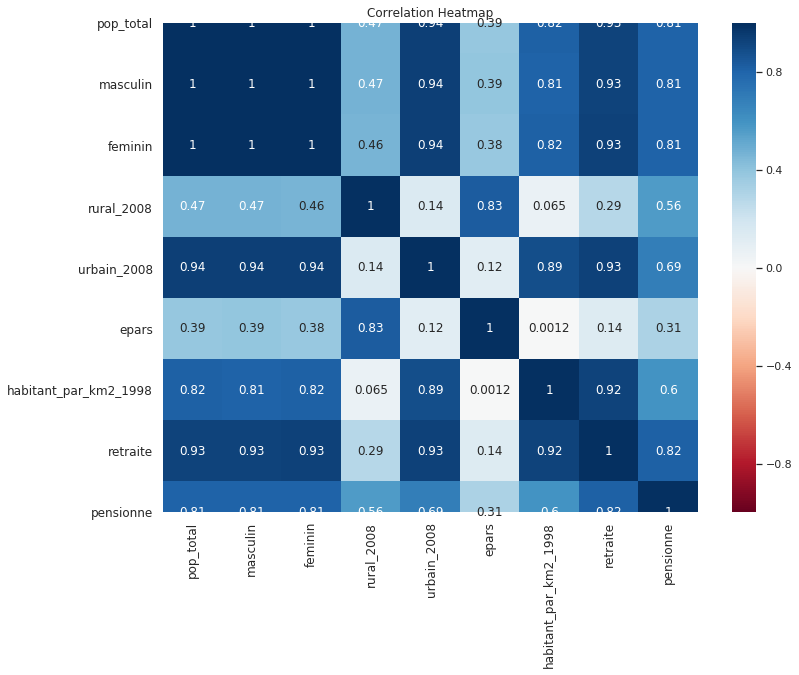

In [145]:
# Afichage des correlations en utilisant un Heat Map.
# RdBu est un shéma de couleur (Red, Blue). D'autre sont possibles : viridis, Blues, YlGnBu ...
plt.figure(figsize = (12, 9))
s = sns.heatmap(df_demographie.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

## Visualisation des données brutes

In [146]:
df_demographie.head()

,pop_total,masculin,feminin,rural_2008,urbain_2008,epars,habitant_par_km2_1998,retraite,pensionne
wilaya_id,,,,,,,,,
1,3.997138e+05,203836.3422,195877.5045,253856,145858,29463,0.7,5595.412054,1514.478842
2,1.002088e+06,502469.9090,499617.9663,503567,498521,213742,179.1,30376.121440,10167.695850
3,4.558675e+05,232657.6061,223209.9158,141353,314248,62202,12.7,10180.646760,4251.039976
4,6.216115e+05,314084.2888,307527.2184,166892,454720,113066,76.5,18378.718520,6933.901688
5,1.119630e+06,565240.5826,554389.5847,434792,684999,203214,79.0,35081.372860,12928.829500


Text(0.5, 1.0, 'Visualisation des données brutes')

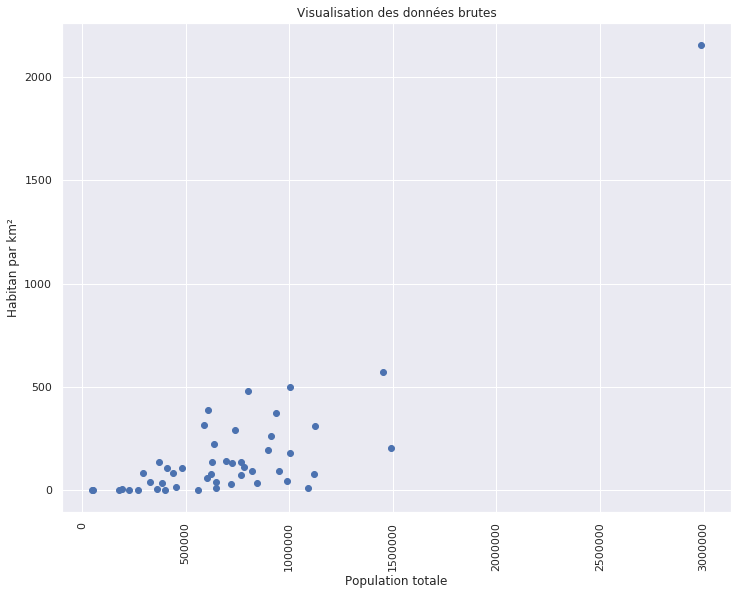

In [157]:
plt.figure(figsize = (12, 9))
plt.scatter(df_demographie['pop_total'], df_demographie['habitant_par_km2_1998'])
plt.xlabel('Population totale')
plt.ylabel('Habitan par km²')
plt.xticks(rotation=90)
plt.title('Visualisation des données brutes')

## Standardisation

In [158]:
# Standardisation des données afin d'égaliser leurs poids, très important pour la modélisation.
scaler = StandardScaler()
demographie_std = scaler.fit_transform(df_demographie)

## Clustering Hierarchique 

In [159]:
# Exécuter un Clustering Hierarchique. Les resultats sont retournés comme une matrice de linkage. 
hier_clust = linkage(demographie_std, method = 'ward')

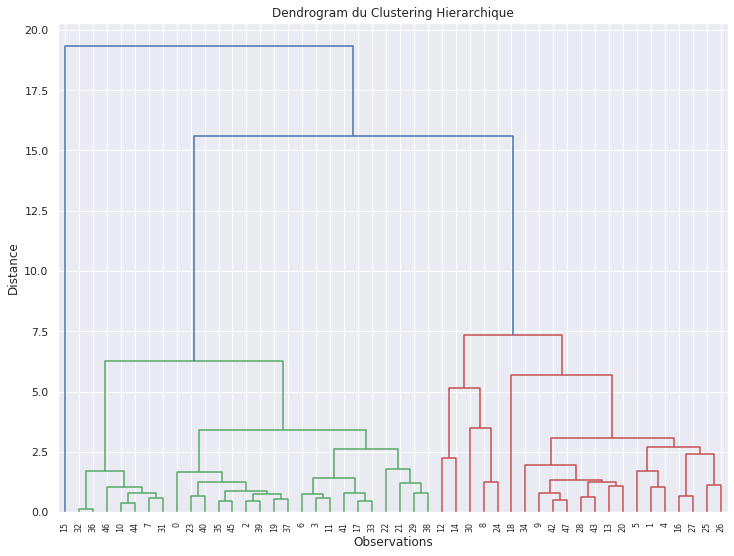

In [164]:
# Affichage du  Clustering Hierarchique utilisant un Dendrogram. 
# Le dendrogram est tronqué à 5 pour une bonne lisibilité (p)
plt.figure(figsize = (12,9))
plt.title('Dendrogram du Clustering Hierarchique')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level', 
#            p = 5, 
           show_leaf_counts = False, 
           no_labels = False)
plt.show()

## K-means Clustering

In [166]:
# Exécuter un clustering K-means. On considère 1 à 10 clusters.
# On utilise l'algortihme à plusieurs points de départs - k means plus plus. 
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(demographie_std)
    wcss.append(kmeans.inertia_)

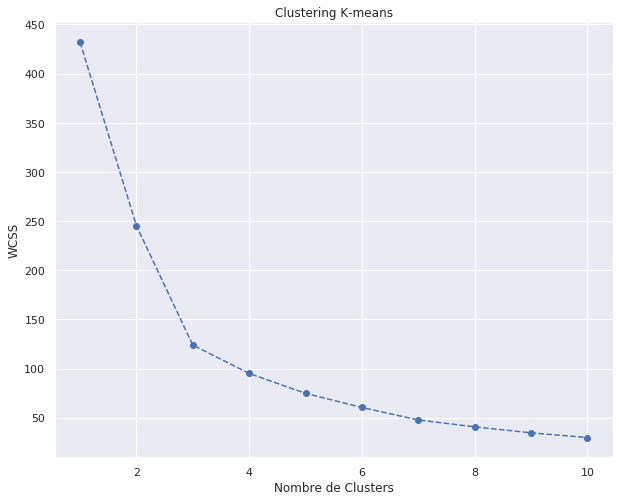

In [169]:
# Affichage des intertias pour les differents nombre de clusters.
# A partir de ce plot on choisie le nombre de clusters. 
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Nombre de Clusters')
plt.ylabel('WCSS')
plt.title('Clustering K-means')
plt.show()

In [172]:
# On exécute K-means avec un nombre fixe de clusters, Dans ce cas 3.
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

In [176]:
# On divise les données en 4 clusters.
kmeans.fit(demographie_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

## Resultats

In [180]:
# On crée un nouveau data frame en ajoutant une nouvelle colonne avec les clusters assignés à chaque point.
df_segm_kmeans = df_demographie.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [182]:
# Calculer les valeurs moyennes pour les clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,pop_total,masculin,feminin,rural_2008,urbain_2008,epars,habitant_par_km2_1998,retraite,pensionne
Segment K-means,,,,,,,,,
0,4.295917e+05,2.172442e+05,2.123476e+05,137698.115385,2.918816e+05,52674.730769,72.484615,14185.63424,4546.304444
1,9.484936e+05,4.801174e+05,4.683761e+05,374210.714286,5.744947e+05,163493.952381,204.961905,33724.95657,10333.421260
2,2.987160e+06,1.499318e+06,1.487842e+06,170276.000000,2.817868e+06,61348.000000,2153.300000,160994.99860,23061.793890


In [184]:
# Calculer la taille et les proportions des clusters
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','pop_total']].groupby(['Segment K-means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [187]:
df_segm_analysis

,pop_total,masculin,feminin,rural_2008,urbain_2008,epars,habitant_par_km2_1998,retraite,pensionne,N Obs,Prop Obs
Segment K-means,,,,,,,,,,,
0,4.295917e+05,2.172442e+05,2.123476e+05,137698.115385,2.918816e+05,52674.730769,72.484615,14185.63424,4546.304444,26,0.541667
1,9.484936e+05,4.801174e+05,4.683761e+05,374210.714286,5.744947e+05,163493.952381,204.961905,33724.95657,10333.421260,21,0.437500
2,2.987160e+06,1.499318e+06,1.487842e+06,170276.000000,2.817868e+06,61348.000000,2153.300000,160994.99860,23061.793890,1,0.020833


In [189]:
df_segm_analysis.rename({0:'eparse',
                         1:'dense',
                         2:'tres-dense'})

,pop_total,masculin,feminin,rural_2008,urbain_2008,epars,habitant_par_km2_1998,retraite,pensionne,N Obs,Prop Obs
Segment K-means,,,,,,,,,,,
eparse,4.295917e+05,2.172442e+05,2.123476e+05,137698.115385,2.918816e+05,52674.730769,72.484615,14185.63424,4546.304444,26,0.541667
dense,9.484936e+05,4.801174e+05,4.683761e+05,374210.714286,5.744947e+05,163493.952381,204.961905,33724.95657,10333.421260,21,0.437500
tres-dense,2.987160e+06,1.499318e+06,1.487842e+06,170276.000000,2.817868e+06,61348.000000,2153.300000,160994.99860,23061.793890,1,0.020833


In [192]:
# Ajouter les labels des segments à la table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'eparse', 
                                                                  1:'dense',
                                                                  2:'tres-dense'})

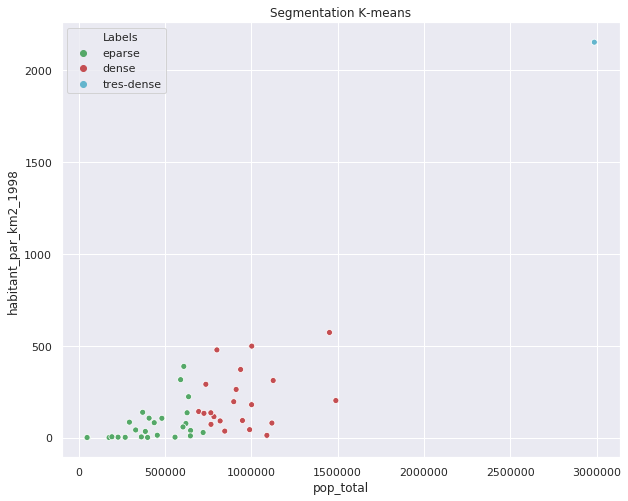

In [195]:
# Affichage des résultats à partir de l'algorithme K-means. 
# Chaque point est affiché avec la couleur du cluster assignée.
x_axis = df_segm_kmeans['pop_total']
y_axis = df_segm_kmeans['habitant_par_km2_1998']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c'])
plt.title('Segmentation K-means')
plt.show()